## T_0 measurements

|Temperature (C$\circ$)|  Resistance ($M\Omega$) |     Voltage (mV)   | 
|----------------------|-------------------------|--------------------|
|   -196 $\pm$ 0.1     |           0.26          |   93.39 $\pm$ 0.65 |  
|   28.1 $\pm$ 0.1     |           0.27          |   130.0 $\pm$ 1.9  |             
|   59.8 $\pm$ 0.1     |           0.27          |   133.7 $\pm$ 1.7  |     (Retake this one)        |   92 $\pm$ 0.3       |           0.27          |   140.5 $\pm$ 2.0  |            
|   129.8 $\pm$ 0.2    |           0.27          |   146.6 $\pm$ 2.0  |            
|   162.7 $\pm$ 0.2    |           0.27          |   151.2 $\pm$ 2.0  |             

| Temperature (C) | G2B (no units) | 
|-----------------|----------------|
|           -196  | $2.701 \times 10^{12} $   |  
|           28     |  $2.553 \times 10^{12} $  |  
|           92           |  $2.425 \times 10^{12} $  |  
|           129          | $2.514 \times 10^{12} $   |             
|           162          |  $2.475 \times 10^{12} $  |      
|           194          | $2.266 \times 10^{12} $   |                                       

$V_{n}$ = noise (V)
<br>
$V_{j}$ = Johnson noise (V)
<br>
$T$ = temperature (K)
<br>
$R$ = resistance ($\Omega$) 
<br> 
$$ \frac{\langle V_{j}^{2} \rangle - \langle V_{n}^{2} \rangle}{2R\int{g^{2}(f)df}} = kT$$ 

We measure $V_{j}$ = $V_rms$ (using the picoscope), $T$ (using a thermometer), $V_{n}$ (amplifier on without any voltage), $R$ (using multimeter).

The slope of the line will be fundamental constant $k$

<br> 
1) PicoScope 2000 Series 
<br>
2) Wired thermometer. 
<br>
3) Soddered resistor. This is soddered onto a split wire with open T connections used for measuring resistance. This connects toour amplifier. 
<br>
4) DC Power Supply (outputs current) 
<br>
5) Filter (1k - 30k) 
<br> 
6) Metal shielding box 
<br>
7) Multimeter (measure resistance)
<br>
8) Alligator clips 
<br> 
9) Large resistor that we use to supply current to increase the temperature. This has copper wires attached to each end so that we can use alligator clips to attach them to our DC power supply.  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Constant gain

In [14]:
# data
T = [-196, 28.1, 59.8, 92, 129.8, 162.7]
V2 = np.square([.09339, .130, .1337, .1405, .1466, .1512])
G2B = [2.701e12, 2.553e12, 2.425e12, 2.514e12, 2.475e12, 2.266e12]

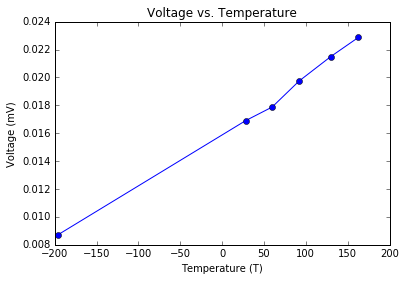

In [15]:
plt.plot(T,V2, '-o')
plt.xlabel("Temperature (T)")
plt.ylabel("Voltage (mV)")
plt.title("Voltage vs. Temperature")

### Variable gain

In [93]:
# data
T = [-196, 28.1, 59.8, 92, 129.8, 162.7] #Celsius
V2 = np.square([.09339, .130, .1337, .1405, .1466, .1512]) #Volts squared
R = [.26, .27, .27, .27, .27, .27] #ohms 
V_n2 = 0.00028**2
G2B = [2.701e12, 2.553e12, 2.425e12, 2.514e12, 2.475e12, 2.266e12]

In [94]:
y_axis = []   # Volts / Kelvin
x_axis = []   # Joules * Ohms / Kelvin 

for i in range(len(V2)):
    R_i = R[i]*1000000
    y_point = (V2[i] - V_n2) / (4*R_i*G2B[i])
    y_axis.append(y_point)

for i in range(len(T)):
    x_point = T[i]
    x_axis.append(x_point)

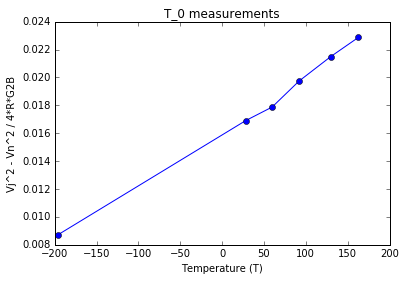

In [95]:
plt.plot(T,V2, '-o')
plt.xlabel("Temperature (T)")
plt.ylabel("Vj^2 - Vn^2 / 4*R*G2B")
plt.title("T_0 measurements")

In [104]:
coeffs = np.polyfit(x_axis, y_axis, 1)
#coeffs_2 = np.polyfit(R, y_axis, 1)
m = coeffs[0]
b = coeffs[1]
print(m)
print(b)
print(coeffs)

1.623761693831728e-23
6.03726943930368e-21
[1.62376169e-23 6.03726944e-21]


(-400, 230)

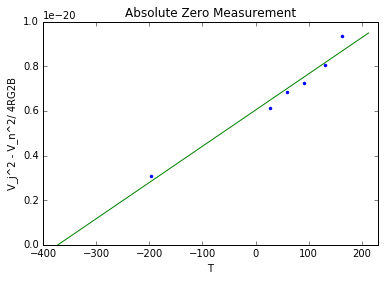

In [112]:
p = np.poly1d(coeffs)
xp = np.linspace(-380, x_axis[-1]+50, 1000)
plt.plot(x_axis, y_axis, '.', xp, p(xp), '-')
plt.ylabel("V_j^2 - V_n^2/ 4RG2B")
plt.xlabel("T")
plt.title("Absolute Zero Measurement")
plt.ylim(0, 1.0e-20)
plt.xlim(-400, 230)

In [19]:
def line_est(x):
    '''
    allows you to calcluate y=0 
    '''
    m = coeffs[0]
    b = coeffs[1]
    return -b / m

In [20]:
def line(x):
    return m*x + b

In [102]:
T_0_est = line_est(0)
T_0_real = -273.15
print("accepted value:", T_0_real)
print("T_0 estimated:", T_0_est)

accepted value: -273.15
T_0 estimated: -371.80760343329837


|    $T$ (C$\circ$)      |     $R$ ($M\Omega$)       |      $V$ (mV)        |     $g^2$ (no units)   | 
|------------------------|---------------------------|----------------------|------------------------|
|   $-196$$\pm$$0.1$     |      $0.26$          |   $93.39$$\pm$$0.65$ |$2.701$$\times$$10^{12}$| 
|   $28.1$$\pm$$0.1$     |     $0.27$          |   $130.0$$\pm$$1.9$  |$2.553$$\times$$10^{12}$|              
|   $59.8$$\pm$$0.1$     |      $0.27$          |   $133.7$$\pm$$1.7$  |$2.425$$\times$$10^{12}$|       
|   $92$$\pm$$0.3$       |     $0.27$          |   $140.5$$\pm$$2.0$  |$2.514$$\times$$10^{12}$|             
|   $129.8$$\pm$$0.2$    |      $0.27$          |   $146.6$$\pm$$2.0$  |$2.475$$\times$$10^{12}$|             
|   $162.7$$\pm$$0.2$    |      $0.27$          |   $151.2$$\pm$$2.0$  |$2.266$$\times$$10^{12}$|      

$$\text{Table ??: Resistance and RMS voltages with different temperatures}$$

In [115]:
# data
T = [-196, 28.1, 59.8, 92, 129.8, 162.7]        # Celsius
V_j = [.09339, .130, .1337, .1405, .1466, .1512] # Volts 
R_raw = [.26, .27, .27, .27, .27, .27]          # Mega Ohms 
R = [i *1000000 for i in R_raw]                 # Ohms 
V_n = 0.00028                                   # Volts 
G2B = [2.701e12, 2.553e12, 2.425e12, 2.514e12, 2.475e12, 2.266e12] # Gain factor 
dR = [0.26, 0.27, 0.27, 0.27, 0.27, 0.27]
dV_j = [0.00065, 0.0019, 0.0017, 0.0020, 0.0020, 0.0020]
dV_n = 0.00008 

In [117]:
# Adding error with multiple variables with respect to kT 

def error_f(Vj, Vn, R, dVj, dVn, dR, g2):
    '''
    returns the error of the boltzmann constant k 
    '''
    dkdR = -(Vj**2 - Vn**2) / (4*(R**2)*g2)
    dkdVj = (2*Vj) / (4*R*g2)
    dkdVn = -(2*Vn) / (4*R*g2)
    
    term1 = dkdR**2 * dR**2
    term2 = dkdVj**2 * dVj**2
    term3 = dkdVn**2 * dVn**2
    
    sum_of_terms = term1 + term2 + term3
    square_of_sums = np.sqrt(sum_of_terms)
    error_f = square_of_sums
    return error_f 

In [118]:
errors_in_kT = []

for i in range(len(V_j)):
    kT_error = error_f(V_j[i], V_n, R[i], dV_j[i], dV_n, dR[i], G2B[i])
    errors_in_kT.append(kT_error)
    
print(errors_in_kT)

[4.322010671938501e-23, 1.7916467275989516e-22, 1.7357006588737715e-22, 2.0698901047920837e-22, 2.1937897572209256e-22, 2.4713151012198748e-22]


In [119]:
import matplotlib
%precision %g
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
%matplotlib inline

1.623761693831728e-23
6.03726943930368e-21
[1.62376169e-23 6.03726944e-21]


(-400, 230)

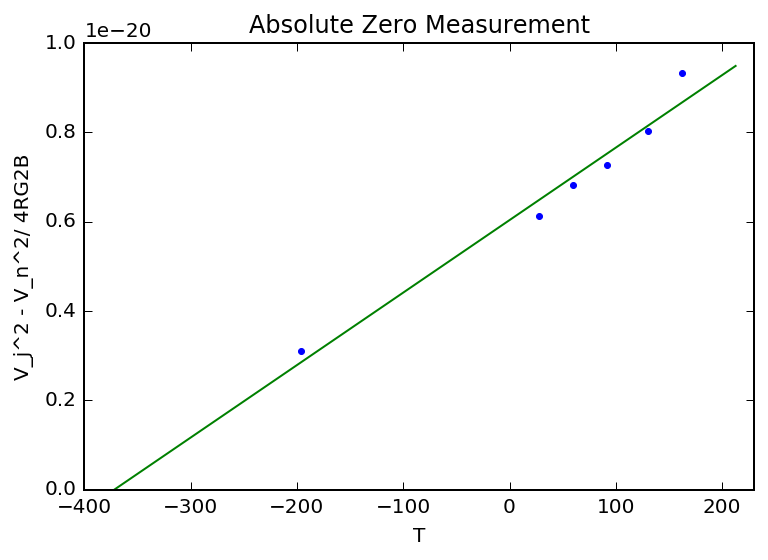

In [120]:
coeffs = np.polyfit(x_axis, y_axis, 1)
#coeffs_2 = np.polyfit(R, y_axis, 1)
m = coeffs[0]
b = coeffs[1]
print(m)
print(b)
print(coeffs)

p = np.poly1d(coeffs)
xp = np.linspace(-380, x_axis[-1]+50, 1000)
plt.plot(x_axis, y_axis, '.', xp, p(xp), '-')
plt.ylabel("V_j^2 - V_n^2/ 4RG2B")
plt.xlabel("T")
plt.title("Absolute Zero Measurement")
plt.ylim(0, 1.0e-20)
plt.xlim(-400, 230)

(-400, 210)

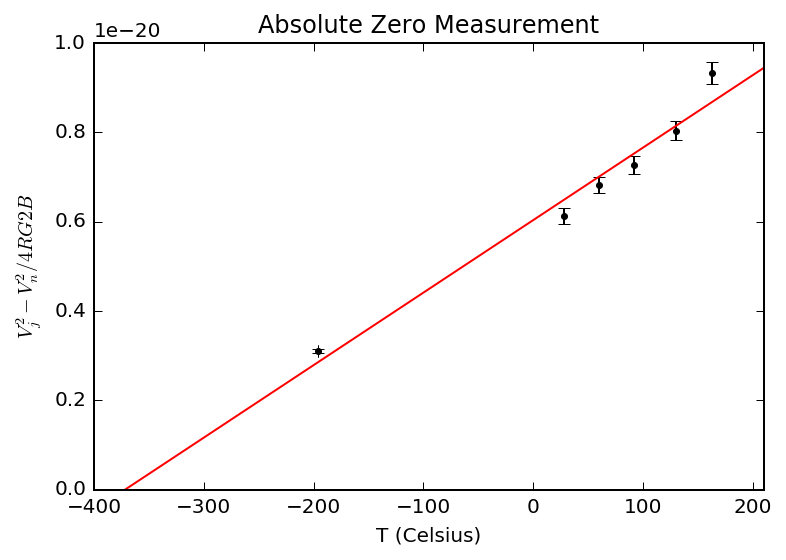

In [126]:
x_err = [0, 0, 0, 0, 0, 0]

# plot data with error
plt.errorbar(x_axis, y_axis, xerr=x_err, yerr=errors_in_kT, fmt = '.', color = 'black')

# plot line of best fit 
plt.plot(xp, p(xp), 'r-')

# add labels and limits 
plt.ylabel("$V_j^2 - V_n^2/ 4RG2B$")
plt.xlabel("T (Celsius)")
plt.title("Absolute Zero Measurement")
plt.ylim(0, 1.0e-20)
plt.xlim(-400, 210)

# Retaking Data with new gain 

realized that we don't have the 59.8 spectrum 

|    $T$ (C$\circ$)      |     $R$ ($M\Omega$)   |   $V$ (mV)        |     $g^2$ (no units)   | 
|------------------------|-----------------------|-------------------|------------------------|
|   $-196$$\pm$$0.1$     |    $0.26$          |   $93.39$$\pm$$0.65$ |$3.60909$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$| 
|   $28.1$$\pm$$0.1$     |    $0.27$          |   $130.0$$\pm$$1.9$  |$3.26317$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|    
|   $92$$\pm$$0.3$       |    $0.27$          |   $140.5$$\pm$$2.0$  |$3.36941$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|     
|   $129.8$$\pm$$0.2$    |    $0.27$          |   $146.6$$\pm$$2.0$  |$3.2163$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|    
|   $162.7$$\pm$$0.2$    |    $0.27$          |   $151.2$$\pm$$2.0$  |$3.99385$$\times$$10^{12}$$\pm$$0.38486$$\times$$10^{12}$|     

$V_{noise} = 5.592mV \pm 46.47 \mu V$

$$\text{Table ??: Different temperatures for measuring Absolute zero}$$

In [39]:
# data
T = [-196, 28.1, 92, 129.8, 162.7]        # Celsius
V_j = [0.09339, 0.130, 0.1405, 0.1466, 0.1512] # Volts 
R_raw = [0.26, 0.27, 0.27, 0.27, 0.27]         # Mega Ohms 
R = [i *1000000 for i in R_raw]           # Ohms 
V_n = 0.00028                             # Volts 
#V_n = 0.0005592                           # new V_noise
G2B = [3.60909e12, 3.26317e12, 3.36941e12, 3.2163e12, 3.99385e12] # Gain factor   

dV_j = [0.00065, 0.0019, 0.0020, 0.0020, 0.0020]
dV_n = 0.00008 
dG2B = 0.38486e12

In [31]:
y_axis = []   # Volts / Kelvin
x_axis = []   # Joules * Ohms / Kelvin 

for i in range(len(V_j)):
    y_point = (V_j[i]**2 - V_n**2) / (4*R[i]*G2B[i])
    y_axis.append(y_point)

for i in range(len(T)):
    x_point = T[i]
    x_axis.append(x_point)

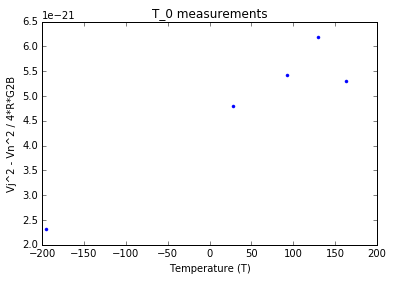

In [32]:
plt.plot(x_axis,y_axis, '.')
plt.xlabel("Temperature (T)")
plt.ylabel("Vj^2 - Vn^2 / 4*R*G2B")
plt.title("T_0 measurements")

In [33]:
coeffs = np.polyfit(x_axis, y_axis, 1)
#coeffs_2 = np.polyfit(R, y_axis, 1)
m = coeffs[0]
b = coeffs[1]
print(m)
print(b)
print(coeffs)

9.837368581108278e-24
4.380018999529616e-21
[9.83736858e-24 4.38001900e-21]


(-400, 230)

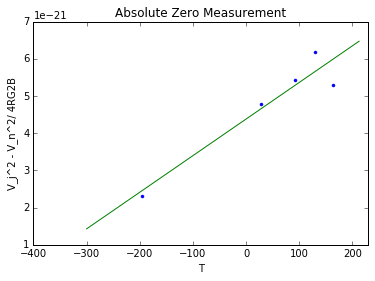

In [34]:
p = np.poly1d(coeffs)
xp = np.linspace(-300, x_axis[-1]+50, 1000)
plt.plot(x_axis, y_axis, '.', xp, p(xp), '-')
plt.ylabel("V_j^2 - V_n^2/ 4RG2B")
plt.xlabel("T")
plt.title("Absolute Zero Measurement")
#plt.ylim(0, 1.0e-20)
plt.xlim(-400, 230)

In [35]:
T_0_est = line_est(0)
T_0_real = -273.15
print("accepted value:", T_0_real)
print("T_0 estimated:", T_0_est)

NameError: name 'line_est' is not defined

In [36]:
# Adding error with multiple variables with respect to kT 

def error_f(Vj, Vn, R, G2B, dVj, dVn, dG2B):
    '''
    returns the error of the boltzmann constant k 
    '''
    dkdR = -(Vj**2 - Vn**2) / (4*(R**2)*G2B)
    dkdVj = (2*Vj) / (4*R*G2B)
    dkdVn = -(2*Vn) / (4*R*G2B)
    dkdG2B = -(Vj**2 - Vn**2) / (4*R*G2B**2)
    
    term1 = dkdVj**2 * dVj**2
    term2 = dkdVn**2 * dVn**2
    term3 = dkdG2B**2 * dG2B**2
    
    sum_of_terms = term1 + term2 + term3
    square_of_sums = np.sqrt(sum_of_terms)
    error_f = square_of_sums
    return error_f 

In [37]:
errors_in_kT = []
x_err = [0, 0, 0, 0, 0]

for i in range(len(V_j)):
    kT_error = error_f(V_j[i], V_n, R[i], G2B[i], dV_j[i], dV_n, dG2B)
    errors_in_kT.append(kT_error)
    
print(errors_in_kT)

[2.498848887071431e-22, 5.8267897686878815e-22, 6.385725268826412e-22, 7.593450075076931e-22, 5.296348211906426e-22]


In [38]:
print("y-axis -- ", y_axis)
print()
print("x-axis -- ", x_axis)
print()
print("errors in y-axis --", errors_in_kT)
2.3235612651132817e-21

y-axis --  [2.32362368886084e-21, 4.795360203592077e-21, 5.4246697987679364e-21, 6.187084538133882e-21, 5.3001308029614056e-21]

x-axis --  [-196, 28.1, 92, 129.8, 162.7]

errors in y-axis -- [2.498848887071431e-22, 5.8267897686878815e-22, 6.385725268826412e-22, 7.593450075076931e-22, 5.296348211906426e-22]


In [50]:
b = 3.524e-21
m = 1.633e-23
b_error = 2.165e-22
m_error = 1.282e-24

T0_exp = -b/m
print(T0_exp)

-215.79914268218008


In [47]:
def error_T(m,b,dm,db):
    '''
    calculates error in T_0
    '''
    dxdb = -1/m
    dxdm = b/(m**2)
    
    term1 = dxdb**2 * db**2
    term2 = dxdm**2 * dm**2
    
    terms = sum([term1, term2])
    dx = np.sqrt(terms)
    
    return dx


In [52]:
T0_error = error_T(m, b, m_error, b_error)
print(T0_error)

21.512403049930715


In [46]:
print(sum([1,2]))

3


Using the ROOT code, we get an absolute temperature measure $T_0$:

$$ T_0 = -215.79 \pm 21.51 \text{ C}$$ 
 
We calculate the number of sigmas we are away from the accepted value using the following formula: 

$$ |k_{experiment} - k_{accepted} | < \sigma \times k_{error} $$ 

We solve for the smallest sigma where this equality holds. 

In [6]:
T0_error = 22.7
T0_exp = -435.9
T0_accepted = -273.15
exp_diff = abs(T0_exp - T0_accepted)
sigma = 8
print("We are within", sigma, "sigma of the mean:", exp_diff < (sigma)*T0_error)

We are within 8 sigma of the mean: True
